In [ ]:
# Minimal setup — avoids overwriting Colab's system deps too much
!pip install torch torchvision torchaudio --upgrade --quiet
!pip install transformers==4.44.2 datasets==2.20.0 evaluate==0.4.2 --quiet

import torch
print("✅ Setup complete")
print(f"Python: {torch.__version__} | CUDA available: {torch.cuda.is_available()}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.1/888.1 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load GPT-2
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Prompt
prompt = "Students learning Artificial Intelligence will"

# Tokenize (truncation only here)
input_ids = tokenizer.encode(prompt, return_tensors="pt", truncation=True)

# Generate text
output_ids = model.generate(
    input_ids,
    max_length=100,          # Limit length
    temperature=0.9,        # Increase randomness
    top_k=50,               # Sample from top 50 tokens
    top_p=0.95,             # Nucleus sampling
    repetition_penalty=1.2, # Reduce repeated phrases
    do_sample=True           # Enable sampling
)

# Decode
generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print("🔹 Prompt:", prompt)
print("\n🔹 Generated:")
print(generated_text)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


🔹 Prompt: Students learning Artificial Intelligence will

🔹 Generated:
Students learning Artificial Intelligence will be able to predict the effects of various kinds (a game, a car) and how it impacts people. They are trained in different ways: they need basic information about what kind/type of cars you drive or where your family is going with an AI that can perform complex computations such as picking up random objects at their own pace; one person who has learned artificial intelligence must also learn computer vision so its possible for them not only to do this but sometimes even create human


In [ ]:
# First, ensure you have the necessary libraries installed:
# pip install transformers torch

from transformers import pipeline

def simple_generate_text():
    """
    This function uses the Hugging Face pipeline for a simplified
    text generation process.
    """
    # --- 1. Create the pipeline ---
    # The 'pipeline' function handles loading the model and tokenizer for you.
    # We are using "distilgpt2", a smaller and faster model for quicker results.
    print("Loading text generation pipeline...")
    try:
        generator = pipeline("text-generation", model="distilgpt2")
        print("Pipeline loaded successfully.")
    except Exception as e:
        print(f"Error loading pipeline: {e}")
        print("Please ensure you have an internet connection.")
        return

    # --- 2. Get user input ---
    prompt = input("Enter your prompt: ")

    # --- 3. Generate and print the text ---
    # The generator object takes care of all the steps.
    # We just provide the prompt and generation parameters.
    print("Generating text...")
    outputs = generator(
        prompt,
        max_length=1150,
        num_return_sequences=1
    )

    print("\n--- Generated Text ---")
    print(outputs[0]['generated_text'])
    print("----------------------\n")


if __name__ == "__main__":
    simple_generate_text()


Loading text generation pipeline...


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Pipeline loaded successfully.
Enter your prompt: generate contain of dog are good for pet


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generating text...

--- Generated Text ---
generate contain of dog are good for pet owners, whether of breeds or sizes, and the range has recently been considered for consideration for pet use. This report was published in Animal Behavior








Selling dog is also a good bet to keep an eye on whether and to if a pet is doing everything in the best interests of your dog and it is good for you. You may also want to consider your own dog for personal safety issues.
To learn more about your dog's abilities and learn more about being a dog, see the following helpful links for guidance and advice on the proper strategies you should use in setting up your dog.
----------------------



In [ ]:
# First, you'll need to install the necessary libraries:
# pip install diffusers transformers accelerate torch

from diffusers import StableDiffusionPipeline
import torch

def generate_image():
    """
    This function takes a user prompt and generates an image using Stable Diffusion.
    """
    model_id = "runwayml/stable-diffusion-v1-5"
    print(f"Loading model: {model_id}...")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")

    try:
        pipe = StableDiffusionPipeline.from_pretrained(
            model_id,
            torch_dtype=torch.float16 if device == "cuda" else torch.float32
        )
        pipe = pipe.to(device)
        print("Model pipeline loaded successfully.")
    except Exception as e:
        print(f"Error loading model: {e}")
        print("Please ensure you have an internet connection, required libraries are installed,")
        print("and that you have enough disk space for the model.")
        return

    # --- User Input ---
    prompt = input("Enter a prompt to generate an image: ")

    # --- Image Generation ---
    print("Generating image... This may take a while, especially on a CPU.")
    # The pipeline takes the prompt and returns an object containing the image(s).
    with torch.no_grad(): # Disables gradient calculations to save memory
        output = pipe(prompt)

    # The generated image is in the 'images' list of the output object.
    image = output.images[0]
    output_filename = "generated_image.png"
    image.save(output_filename)
    print(f"\n--- Success! ---")
    print(f"Image saved as {output_filename}")
    print("------------------\n")


if __name__ == "__main__":
    generate_image()


Loading model: runwayml/stable-diffusion-v1-5...
Using device: cuda


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Model pipeline loaded successfully.
Enter a prompt to generate an image: car on road
Generating image... This may take a while, especially on a CPU.


  0%|          | 0/50 [00:00<?, ?it/s]


--- Success! ---
Image saved as generated_image.png
------------------



In [ ]:
# First, you'll need to install the necessary libraries:
!pip install transformers torch scipy accelerate

from transformers import pipeline
from scipy.io.wavfile import write
import torch

def generate_music():
    """
    This function uses the Hugging Face pipeline to generate music
    from a text prompt using the MusicGen model.
    """
    # --- 1. Create the pipeline ---
    # We use the "text-to-audio" task and specify the "facebook/musicgen-small" model.
    # This model is designed to turn text descriptions into music.
    # Using a GPU ("cuda") is highly recommended as this is computationally intensive.
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")

    print("Loading music generation pipeline (this may take a moment)...")
    try:
        synthesizer = pipeline("text-to-audio", model="facebook/musicgen-small", device=device)
        print("Pipeline loaded successfully.")
    except Exception as e:
        print(f"Error loading pipeline: {e}")
        print("Please ensure you have an internet connection and all required libraries are installed.")
        return

    # --- 2. Get user input ---
    prompt = input("Enter a description for the music: ")

    # --- 3. Generate the audio ---
    # The pipeline takes the text prompt. We can also pass parameters
    # to control the generation. 'max_new_tokens' affects the length of the audio.
    print("Generating music... This can take some time.")
    music = synthesizer(prompt, forward_params={"max_new_tokens": 256})

    # The output is a dictionary containing the audio waveform and the sampling rate.
    audio_waveform = music["audio"]
    sampling_rate = music["sampling_rate"]

    # --- 4. Save the audio to a file ---
    # We use scipy's wavfile.write to save the numpy array as a .wav file.
    output_filename = "generated_music.wav"
    print(f"Saving audio to {output_filename}...")

    # The audio waveform might need to be transposed depending on the model's output format.
    # We write it with the correct sampling rate.
    write(output_filename, rate=sampling_rate, data=audio_waveform[0].T)

    print("\n--- Success! ---")
    print(f"Music saved as {output_filename}")
    print("------------------\n")


if __name__ == "__main__":
    generate_music()


Using device: cuda:0
Loading music generation pipeline (this may take a moment)...


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/2.36G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/usr/local/lib/python3.11/dist-packages/transformers/models/encodec/modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)


generation_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Pipeline loaded successfully.
Enter a description for the music: rain
Generating music... This can take some time.


`torch.nn.functional.scaled_dot_product_attention` does not support having an empty attention mask. Falling back to the manual attention implementation. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.Note that this probably happens because `guidance_scale>1` or because you used `get_unconditional_inputs`. See https://github.com/huggingface/transformers/issues/31189 for more information.


Saving audio to generated_music.wav...

--- Success! ---
Music saved as generated_music.wav
------------------



Please upload an image file.


Saving me.jpg to me.jpg

Processing image: me.jpg


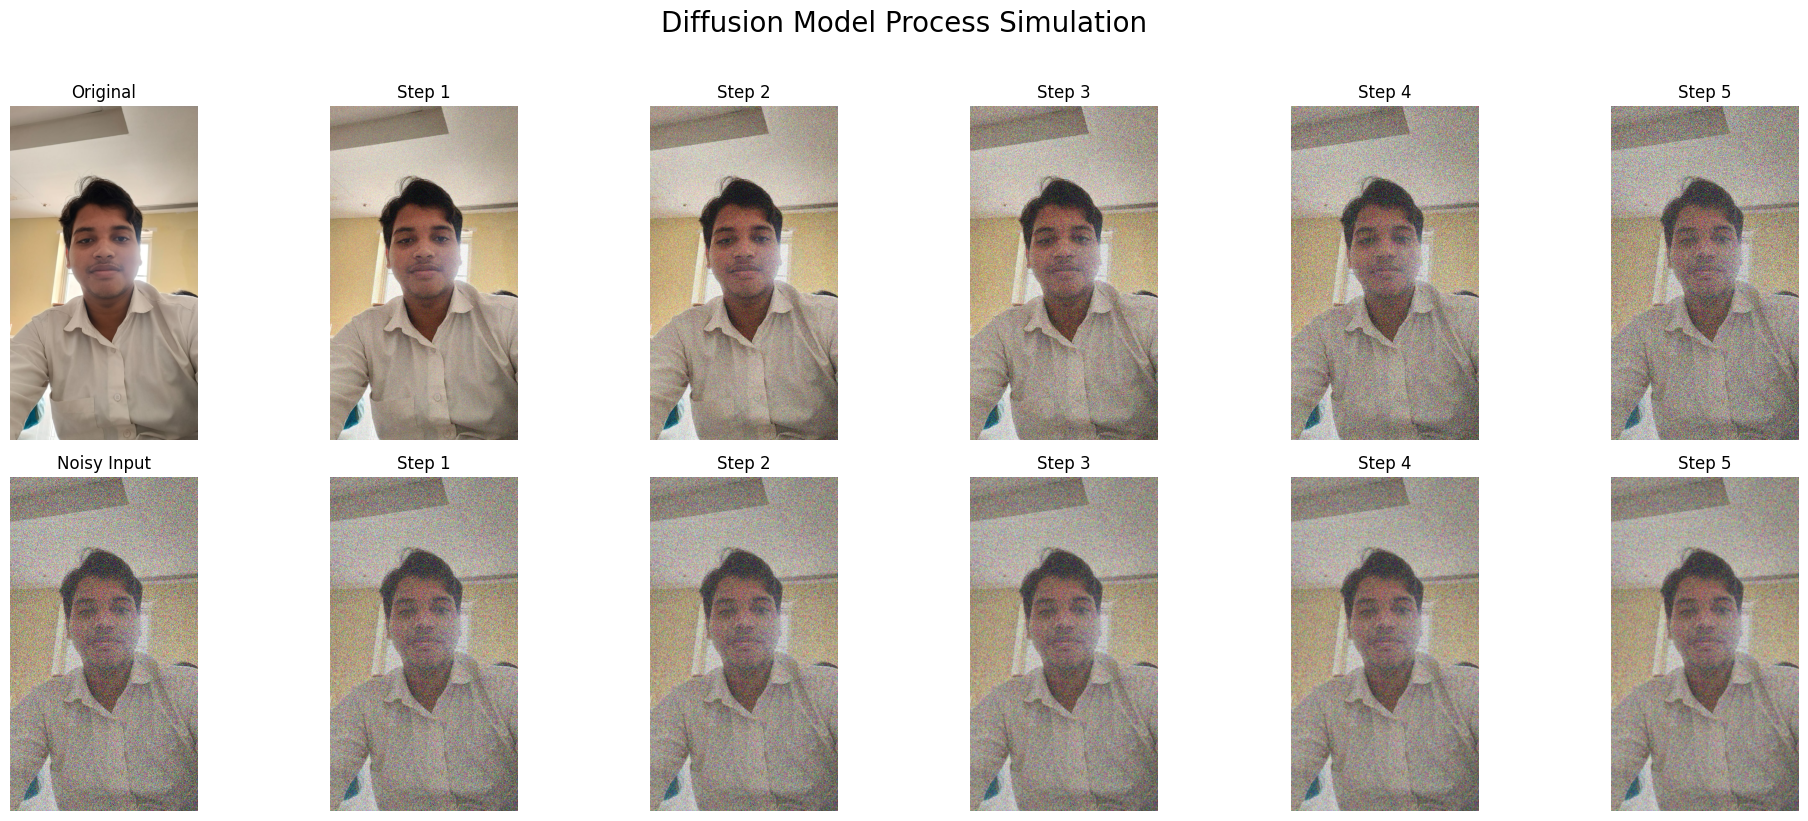

In [ ]:
# @title Step 1: Install and Import Necessary Libraries
# We need Pillow for image processing, NumPy for numerical operations,
# and matplotlib to display the images.
!pip install Pillow numpy matplotlib

import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from google.colab import files
import io

# @title Step 2: Define the Diffusion and Denoising Functions

def generate_forward_steps(image_array, num_steps=5, max_noise_factor=0.6):
    """
    Generates a sequence of images with increasing noise.

    Args:
        image_array (np.array): The input image as a NumPy array.
        num_steps (int): The number of intermediate steps to generate.
        max_noise_factor (float): The final noise level.

    Returns:
        list[PIL.Image]: A list of PIL images representing the forward process.
    """
    steps = [Image.fromarray(image_array)] # Start with the original image

    for i in range(1, num_steps + 1):
        noise_factor = (i / num_steps) * max_noise_factor

        # Generate Gaussian noise
        noise = np.random.normal(loc=0, scale=noise_factor * 255, size=image_array.shape)

        # Add noise to the original image and clip
        noisy_image_array = np.clip(image_array + noise, 0, 255).astype(np.uint8)

        steps.append(Image.fromarray(noisy_image_array))

    return steps

def generate_reverse_steps(noisy_image, num_steps=5, max_blur_radius=2.5):
    """
    Generates a sequence of images with increasing denoising (blur).

    Args:
        noisy_image (PIL.Image): The noisiest input image.
        num_steps (int): The number of intermediate steps to generate.
        max_blur_radius (float): The maximum blur radius to apply.

    Returns:
        list[PIL.Image]: A list of PIL images representing the reverse process.
    """
    steps = [noisy_image] # Start with the noisiest image

    # We apply blur iteratively to the previously blurred image
    current_image = noisy_image
    for i in range(1, num_steps + 1):
        # We apply a small, consistent blur at each step
        denoised_image = current_image.filter(ImageFilter.GaussianBlur(radius=0.7))
        steps.append(denoised_image)
        current_image = denoised_image

    return steps


# @title Step 3: Upload and Process the Image

def run_diffusion_demo(num_steps=5):
    """
    Main function to run the diffusion model demonstration.
    It handles image upload, processing, and displaying the results.
    """
    print("Please upload an image file.")
    uploaded = files.upload()

    if not uploaded:
        print("\nNo file uploaded. Please run the cell again to upload an image.")
        return

    filename = next(iter(uploaded))
    print(f"\nProcessing image: {filename}")

    try:
        # --- Image Loading and Preparation ---
        original_image = Image.open(io.BytesIO(uploaded[filename])).convert("RGB")
        original_array = np.array(original_image)

        # --- Generate Diffusion Steps ---
        forward_steps = generate_forward_steps(original_array, num_steps=num_steps)
        # The last image from the forward process is the input for the reverse process
        reverse_steps = generate_reverse_steps(forward_steps[-1], num_steps=num_steps)

        # --- Display the Results ---
        total_cols = num_steps + 1
        fig, axes = plt.subplots(2, total_cols, figsize=(20, 8))

        fig.suptitle('Diffusion Model Process Simulation', fontsize=20, y=1.02)

        # Display Forward Diffusion Process
        for i, img in enumerate(forward_steps):
            ax = axes[0, i]
            ax.imshow(img)
            ax.axis('off')
            if i == 0:
                ax.set_title("Original")
            else:
                ax.set_title(f"Step {i}")
        axes[0, 0].set_ylabel("Forward Process\n(Adding Noise)", fontsize=14, labelpad=20)


        # Display Reverse Diffusion Process
        for i, img in enumerate(reverse_steps):
            ax = axes[1, i]
            ax.imshow(img)
            ax.axis('off')
            if i == 0:
                ax.set_title("Noisy Input")
            else:
                ax.set_title(f"Step {i}")
        axes[1, 0].set_ylabel("Reverse Process\n(Denoising)", fontsize=14, labelpad=20)

        # Hide any unused subplots if reverse_steps has fewer images
        for i in range(len(reverse_steps), total_cols):
            axes[1, i].axis('off')


        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")
        print("Please make sure you uploaded a valid image file (e.g., JPG, PNG).")

# @title Step 4: Run the Demonstration
# Execute this cell to start the process. You can change the number of steps.
run_diffusion_demo(num_steps=5)
